In [1]:
import tensorflow as tf
gpus = tf.config.list_physical_devices("GPU")
if gpus:
    for gpu in gpus:
        print("Found a GPU with the name:", gpu)
else:
    print("Failed to detect a GPU.")

Found a GPU with the name: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers,regularizers
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.optimizers import Adam
import numpy as np
import splitfolders
from matplotlib import pyplot
from matplotlib.image import imread

In [4]:
folder = r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\PetImages'
split_ratio = (0.9, 0.0, 0.1)

In [5]:
splitfolders.ratio(
    folder,
    output=r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output',
    seed=500,
    ratio=split_ratio,
    group_prefix=None,
)

Copying files: 24961 files [01:42, 242.95 files/s]


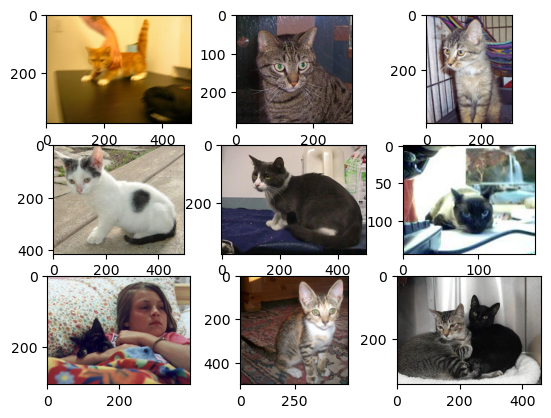

In [6]:
train_folder = r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\train\Cat/'
# plot first few images
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # define filename
 filename = train_folder + str(i) + '.jpg'
 # load image pixels
 image = imread(filename)
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

In [3]:
# Preprocessing Parameters

img_h = img_w = 150
batch_size = 64
# Train and Validation Generator
tvgen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.1, # horizontal shift
    height_shift_range=0.1,  # vertical shift
    rotation_range=10, # rotation
    #zoom_range=0.2, # zoom
    horizontal_flip=True, # horizontal flip
    #brightness_range=[0.2,1.2], # brightness
    data_format='channels_last',
    validation_split=0.3
)

In [4]:
# Training Dataset

train_ds = tvgen.flow_from_directory(
    r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\train',
    target_size=(img_h, img_w),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=300,
    subset='training'
)

# Validation Dataset

val_ds = tvgen.flow_from_directory(
    r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\train',
    target_size=(img_h, img_w),
    batch_size=128,
    class_mode='categorical',
    shuffle=True,
    seed=300,
    subset='validation'
)

testgen = ImageDataGenerator(
rescale=1./255
)

test_ds = testgen.flow_from_directory(
    r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\test',
    target_size=(img_h, img_w),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 15724 images belonging to 2 classes.
Found 6738 images belonging to 2 classes.
Found 2497 images belonging to 2 classes.


In [19]:
# Hyperparameters

#w_decay = 0.001
#l_rate = 0.001
#define model
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(img_h,img_w,3)))
model.add(MaxPooling2D((2, 2)))
#model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(w_decay)))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3),activation='relu' ))
#model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
#model.add(Dropout(0.6))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 74, 74, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 17, 17, 128)     

In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
history=model.fit(train_ds, epochs=30, validation_data=val_ds, verbose=1)

Epoch 1/30
246/246 [==============================] - 177s 702ms/step - loss: 0.6936 - accuracy: 0.4945 - val_loss: 0.6932 - val_accuracy: 0.4996
Epoch 2/30
246/246 [==============================] - 181s 734ms/step - loss: 0.6921 - accuracy: 0.5190 - val_loss: 0.6908 - val_accuracy: 0.5009
Epoch 3/30
246/246 [==============================] - 182s 740ms/step - loss: 0.6826 - accuracy: 0.5647 - val_loss: 0.6822 - val_accuracy: 0.5531
Epoch 4/30
246/246 [==============================] - 183s 746ms/step - loss: 0.6656 - accuracy: 0.5979 - val_loss: 0.6346 - val_accuracy: 0.6392
Epoch 5/30
246/246 [==============================] - 179s 728ms/step - loss: 0.6020 - accuracy: 0.6745 - val_loss: 0.5531 - val_accuracy: 0.7136
Epoch 6/30
246/246 [==============================] - 180s 732ms/step - loss: 0.5472 - accuracy: 0.7220 - val_loss: 0.5178 - val_accuracy: 0.7438
Epoch 7/30
246/246 [==============================] - 184s 748ms/step - loss: 0.5093 - accuracy: 0.7544 - val_loss: 0.4998 -

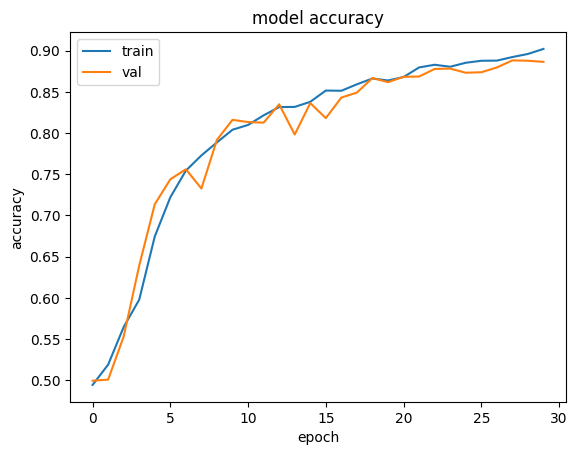

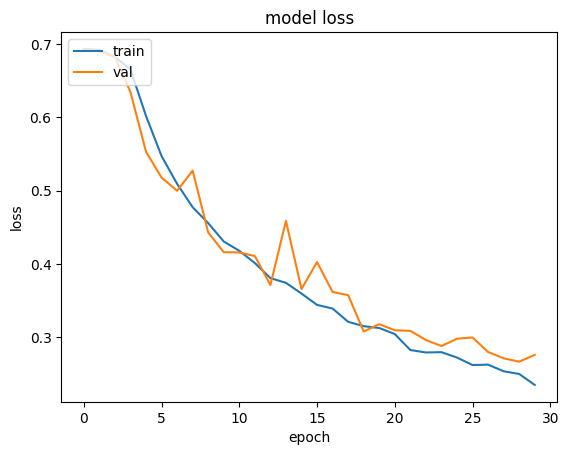

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


In [23]:
test_eval = model.evaluate(test_ds)

print(f"Loss on Test Dataset is {test_eval[0]:.2f} and Test Dataset Accuracy is {test_eval[1]:.2f}.")

40/40 [==============================] - 9s 236ms/step - loss: 0.2574 - accuracy: 0.8999
Loss on Test Dataset is 0.26 and Test Dataset Accuracy is 0.90.


In [24]:
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import numpy as np
predict_list = [
    r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\test\Cat\8732.jpg',
    r'D:\Deep Learning Internship_Codexcue\Task 3_CatvsDog\kagglecatsanddogs_3367a\output\test\Dog\356.jpg'
    ]
train_ds.class_indices

classes = ['Cat','Dog']

def predictshow(x=0):
    path = predict_list[x]
    img = load_img(path, target_size=(img_h,img_w,3))
    X = img_to_array(img)
    X = np.expand_dims(X, axis=0)
    val = model.predict(X)
    print(val)
    img = Image.open(path)  
    plt.imshow(img)
    plt.title(label=str(classes[np.argmax(val)]))
    plt.show

1/1 [==============================] - 0s 264ms/step
[[1. 0.]]


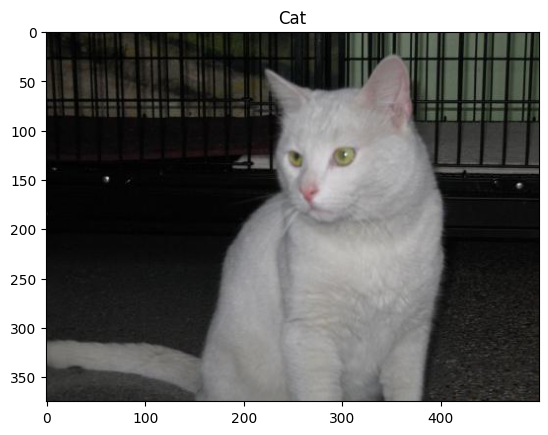

In [25]:
predictshow(0)


1/1 [==============================] - 0s 33ms/step
[[0. 1.]]


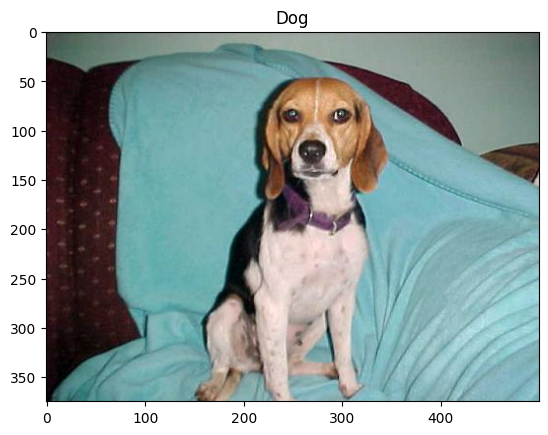

In [26]:
predictshow(1)

In [27]:
model.save('cats_vs_dogs_aug.keras')
